### In this notebook you will plot raw data from the PFISR energy inversions using substorm onset

@author Riley Troyer
science@rileytroyer.com

In [29]:
# Import needed libraries
#import rtroyer_useful_functions as rt_func

import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
import pickle
import pprint
import scipy.stats as stats

In [4]:
# Read in the data file
chemistry_type = 'stanford'
with open(f'../../data/interim/statistics/pa_inversion_results_{chemistry_type}.pickle', 'rb') as handle:
    pa_inversion_results = pickle.load(handle)

In [5]:
# List all of the data types
test_time = list(pa_inversion_results.keys())[0]
list(pa_inversion_results[test_time].keys())

['altitude',
 'initial_density',
 'modeled_density',
 'measured_density',
 'energy_bins',
 'modeled_flux',
 'chi2',
 'dof',
 'converged',
 'units',
 'low_altitude',
 'substorm_delay',
 'substorm',
 'pa_event',
 'local_time',
 'mlt_time',
 'ae_index',
 'al_index',
 'total_energy',
 'high_10keV',
 'low_10keV',
 'high_30keV',
 'low_30keV',
 'high_50keV',
 'low_50keV',
 'high_100keV',
 'low_100keV']

### Split data based on delay
This bit is a bit of a mess as far as the code goes. I split based on 4 different delays then go through these manually, so the code is a bit long.
I'll hide/collapse this cell so the notebook looks a little nicer. However, the cell will print out some statistics associated with the bins.

In [10]:
 # Loop through each inversion slice and classify based on delay
names = ['0-20', '20-40', '40-60', '>60']
spectrum_data = {names[0] : {},
                 names[1] : {},
                 names[2] : {},
                 names[3] : {},
                }
binary_energy_data = {names[0] : {'low_10keV' : {},
                                  'high_10keV' : {},
                                  'low_30keV' : {},
                                  'high_30keV' : {},
                                  'low_50keV' : {},
                                  'high_50keV' : {},
                                  'low_100keV' : {},
                                  'high_100keV' : {},
                                  'total_energy' : {}},
                      names[1] : {'low_10keV' : {},
                                  'high_10keV' : {},
                                  'low_30keV' : {},
                                  'high_30keV' : {},
                                  'low_50keV' : {},
                                  'high_50keV' : {},
                                  'low_100keV' : {},
                                  'high_100keV' : {},
                                  'total_energy' : {}},
                      names[2] : {'low_10keV' : {},
                                  'high_10keV' : {},
                                  'low_30keV' : {},
                                  'high_30keV' : {},
                                  'low_50keV' : {},
                                  'high_50keV' : {},
                                  'low_100keV' : {},
                                  'high_100keV' : {},
                                  'total_energy' : {}},
                      names[3] : {'low_10keV' : {},
                                  'high_10keV' : {},
                                  'low_30keV' : {},
                                  'high_30keV' : {},
                                  'low_50keV' : {},
                                  'high_50keV' : {},
                                  'low_100keV' : {},
                                  'high_100keV' : {},
                                  'total_energy' : {}}
                     }

# Count number of events in each bin
events_00 = []
events_20 = []
events_40 = []
events_60 = []

# Count different PA events and number of days
selected_events = []
selected_dates = []

# Loop through each key and assign to classification
for key in pa_inversion_results.keys():
    
    # Only include good fits
    converged = pa_inversion_results[key]['converged']
    chi2 = pa_inversion_results[key]['chi2']
    reduced_chi2 = chi2/pa_inversion_results[key]['dof']
    
    # If fit didn't converge, skip
    if converged == False:
        continue
    
    # If chi2 not in reasonable bounds skip
    if (reduced_chi2 < 0) or (reduced_chi2 > 3):
        continue
        
    # Also make sure time is defined
    if np.isnan(pa_inversion_results[key]['substorm_delay']):
        continue
    
    # Get data
    
    # Number flux needs to be multiplied by energy bin width
    energy_bins = pa_inversion_results[key]['energy_bins']
    bin_widths = energy_bins - np.roll(energy_bins, shift=1)
    #...fix first value
    bin_widths[0] = energy_bins[0] - 0
    
    num_flux = pa_inversion_results[key]['modeled_flux']*bin_widths
    
    delay = pa_inversion_results[key]['substorm_delay']
    mlt = key#pa_inversion_results[key]['mlt_time']
    high_energy_10 = pa_inversion_results[key]['high_10keV']
    low_energy_10 = pa_inversion_results[key]['low_10keV']
    high_energy_30 = pa_inversion_results[key]['high_30keV']
    low_energy_30 = pa_inversion_results[key]['low_30keV']
    high_energy_50 = pa_inversion_results[key]['high_50keV']
    low_energy_50 = pa_inversion_results[key]['low_50keV']
    high_energy_100 = pa_inversion_results[key]['high_100keV']
    low_energy_100 = pa_inversion_results[key]['low_100keV']
    total_energy = pa_inversion_results[key]['total_energy']
    
    # Add to PA events and dates list
    selected_events.append(pa_inversion_results[key]['pa_event'])
    selected_dates.append(key.date())

    
    if delay <= 20:
        n = 0
        spectrum_data[names[n]][mlt] = num_flux
        
        binary_energy_data[names[n]]['high_10keV'][mlt] = high_energy_10
        binary_energy_data[names[n]]['low_10keV'][mlt] = low_energy_10        
        binary_energy_data[names[n]]['high_30keV'][mlt] = high_energy_30
        binary_energy_data[names[n]]['low_30keV'][mlt] = low_energy_30
        binary_energy_data[names[n]]['high_50keV'][mlt] = high_energy_50
        binary_energy_data[names[n]]['low_50keV'][mlt] = low_energy_50
        binary_energy_data[names[n]]['high_100keV'][mlt] = high_energy_100
        binary_energy_data[names[n]]['low_100keV'][mlt] = low_energy_100
        binary_energy_data[names[n]]['total_energy'][mlt] = total_energy
        
        events_00.append(pa_inversion_results[key]['pa_event'])
    
    elif (delay > 20) and (delay <= 40):
        n = 1
        spectrum_data[names[n]][mlt] = num_flux
        
        binary_energy_data[names[n]]['high_10keV'][mlt] = high_energy_10
        binary_energy_data[names[n]]['low_10keV'][mlt] = low_energy_10        
        binary_energy_data[names[n]]['high_30keV'][mlt] = high_energy_30
        binary_energy_data[names[n]]['low_30keV'][mlt] = low_energy_30
        binary_energy_data[names[n]]['high_50keV'][mlt] = high_energy_50
        binary_energy_data[names[n]]['low_50keV'][mlt] = low_energy_50
        binary_energy_data[names[n]]['high_100keV'][mlt] = high_energy_100
        binary_energy_data[names[n]]['low_100keV'][mlt] = low_energy_100
        binary_energy_data[names[n]]['total_energy'][mlt] = total_energy
        
        events_20.append(pa_inversion_results[key]['pa_event'])
        
    elif (delay > 40) and (delay <= 60):
        n = 2
        spectrum_data[names[n]][mlt] = num_flux
        
        binary_energy_data[names[n]]['high_10keV'][mlt] = high_energy_10
        binary_energy_data[names[n]]['low_10keV'][mlt] = low_energy_10        
        binary_energy_data[names[n]]['high_30keV'][mlt] = high_energy_30
        binary_energy_data[names[n]]['low_30keV'][mlt] = low_energy_30
        binary_energy_data[names[n]]['high_50keV'][mlt] = high_energy_50
        binary_energy_data[names[n]]['low_50keV'][mlt] = low_energy_50
        binary_energy_data[names[n]]['high_100keV'][mlt] = high_energy_100
        binary_energy_data[names[n]]['low_100keV'][mlt] = low_energy_100
        binary_energy_data[names[n]]['total_energy'][mlt] = total_energy
        
        events_40.append(pa_inversion_results[key]['pa_event'])
        
    elif (delay > 60):# and (delay <=180):
        n = 3
        spectrum_data[names[n]][mlt] = num_flux
        
        binary_energy_data[names[n]]['high_10keV'][mlt] = high_energy_10
        binary_energy_data[names[n]]['low_10keV'][mlt] = low_energy_10        
        binary_energy_data[names[n]]['high_30keV'][mlt] = high_energy_30
        binary_energy_data[names[n]]['low_30keV'][mlt] = low_energy_30
        binary_energy_data[names[n]]['high_50keV'][mlt] = high_energy_50
        binary_energy_data[names[n]]['low_50keV'][mlt] = low_energy_50
        binary_energy_data[names[n]]['high_100keV'][mlt] = high_energy_100
        binary_energy_data[names[n]]['low_100keV'][mlt] = low_energy_100
        binary_energy_data[names[n]]['total_energy'][mlt] = total_energy
        
        events_60.append(pa_inversion_results[key]['pa_event'])
        
print('0-20 min:', len(spectrum_data[names[0]].keys()))
print('Events: ', len(np.unique(events_00)))
print('20-40 min:', len(spectrum_data[names[1]].keys()))
print('Events: ', len(np.unique(events_20)))
print('40-60 min:', len(spectrum_data[names[2]].keys()))
print('Events: ', len(np.unique(events_40)))
print('>60 min:', len(spectrum_data[names[3]].keys()))
print('Events: ', len(np.unique(events_60)))

# Average energy spectra for 0-20min
#...set anything <=0 to 1
#...use geometric mean to better account for large values
substorm_data = np.array(list(spectrum_data[names[0]].values()))
substorm_data[substorm_data <= 0] = 1
substorm_spectrum = stats.mstats.gmean(substorm_data, axis=0)
substorm_std = np.nanstd(substorm_data, axis=0)

# 20-40min
kinda_substorm_data1 = np.array(list(spectrum_data[names[1]].values()))
kinda_substorm_data1[kinda_substorm_data1 <= 0] = 1
kinda_substorm_spectrum1 = stats.mstats.gmean(kinda_substorm_data1,
                                              axis=0)
kinda_substorm_std1 = np.nanstd(kinda_substorm_data1, axis=0)

# 40-60min
kinda_substorm_data2 = np.array(list(spectrum_data[names[2]].values()))
kinda_substorm_data2[kinda_substorm_data2 <= 0] = 1
kinda_substorm_spectrum2 = stats.mstats.gmean(kinda_substorm_data2,
                                              axis=0)
kinda_substorm_std2 = np.nanstd(kinda_substorm_data2, axis=0)

# Non substorm
non_substorm_data = np.array(list(spectrum_data[names[3]].values()))
non_substorm_data[non_substorm_data <= 0] = 1
non_substorm_spectrum = stats.mstats.gmean(non_substorm_data, axis=0)
non_substorm_std = np.nanstd(non_substorm_data, axis=0)

# Get unique PA events
selected_events = np.unique(selected_events)
print('Total number of events:', len(selected_events))
selected_dates = np.unique(selected_dates)
print('Total number of dates:', len(selected_dates))

0-20 min: 509
Events:  30
20-40 min: 480
Events:  27
40-60 min: 310
Events:  20
>60 min: 1524
Events:  41
Total number of events: 53
Total number of dates: 47


### Now I limit to just one energy threshold, for the paper it was 30 keV

In [11]:
# Get total energy distribution and energy percentages for each event
total_energies = []
high_energy_makeup = []
mlts = []

# Loop through all substorm classifications
for n in [0, 1, 2, 3]:
    
    # Loop through all times
    for mlt in binary_energy_data[names[n]]['high_30keV'].keys():
    
        # Get the energy components
        high_energy = binary_energy_data[names[n]]['high_30keV'][mlt]
        low_energy = binary_energy_data[names[n]]['low_30keV'][mlt]
        total_energy = binary_energy_data[names[n]]['total_energy'][mlt]
        
        total_energies.append(total_energy)
        
        # Calculate the percentage of energy from high energies
        high_energy_makeup.append(high_energy/total_energy)
        
        # Also keep track of times
        mlts.append(mlt)
        
total_energies = np.array(total_energies)
high_energy_makeup = np.array(high_energy_makeup)

### Now plot a histogram of the energy ranges

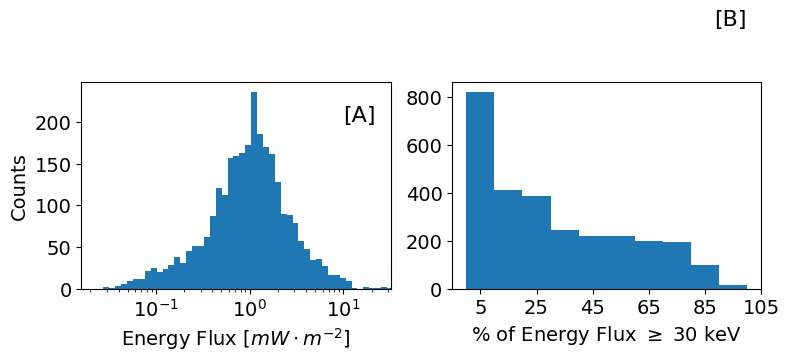

In [15]:
# Plot histograms of data
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Set ticks
axs[0].tick_params(which='major', labelsize=14)
axs[1].tick_params(which='major', labelsize=14)

# Set up total energy axis and labels.
axs[0].set_xlabel(r'Energy Flux ${\left[mW \cdot m^{-2}'
                  r'\right]}$', fontsize = 14)
axs[0].set_ylabel('Counts', fontsize = 14)
axs[0].set_xscale('log')
axs[0].set_xlim(1e14*1.6e-16, 2e17*1.6e-16)

# Plot total energy
total_energy_bins = np.logspace(np.log10(np.min(total_energies)),
                                np.log10(np.max(total_energies)), 50)
axs[0].hist(total_energies * 1.6e-16,
            bins = total_energy_bins * 1.6e-16)

# Set up energy percentage axis and labels.
axs[1].set_xlabel(r'% of Energy Flux $\geq$ 30 keV', fontsize = 14)

# Plot energy percentage
high_energy_makeup_bins = np.linspace(0, 100, 11)
axs[1].hist(high_energy_makeup*100,
            bins=high_energy_makeup_bins, log=False)
axs[1].set_xticks(np.linspace(0, 100, 6)+5)


# Add text to plots
# Add text to figures
axs[0].text(10, 200, '[A]',
            fontsize=16)
axs[1].text(88, 1100, '[B]',
            fontsize=16)

plt.tight_layout()

### Plot to show which events occured for which percentage of energy content > 30 keV

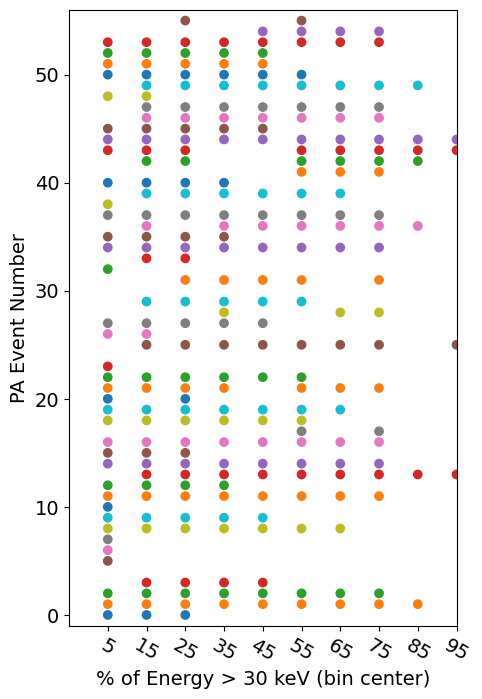

In [20]:
# Get a list of number of events in each bin
pa_events = np.zeros(len(mlts))

# Loop through each time
#...note even though it's called mlt it is actually ut for this
for time_i, time in enumerate(mlts):
    
    pa_events[time_i] = pa_inversion_results[time]['pa_event']

# Create custom colormap to plot with

# Use tab10 cmap
tab10 = colormaps.get_cmap('tab10')
tab10_colors = tab10.colors

# New cmap is just this repeated several times
new_tab10_colors = np.concatenate((tab10_colors, tab10_colors,
                                   tab10_colors, tab10_colors,
                                   tab10_colors, tab10_colors,
                                   tab10_colors))
new_tab10 = ListedColormap(new_tab10_colors)

# Values to find correct indices to get events for each bins
y = high_energy_makeup*100
x = high_energy_makeup_bins

# Number of bins
bin_num = np.arange(len(x) - 1)

# Setup plot
fig, ax = plt.subplots(figsize = (5, 8))

# Axis and ticks
x_tick_labels = ['5', '15', '25', '35',
                 '45', '55', '65', '75',
                 '85', '95']
plt.xticks(ticks=bin_num, labels=x_tick_labels,
           fontsize=14, rotation=-30)
plt.yticks(fontsize=14)
ax.set_ylim(min(pa_events)-1, max(pa_events)+1)
ax.set_xlim(-1, max(bin_num))
ax.set_ylabel('PA Event Number', fontsize=14)
ax.set_xlabel('% of Energy > 30 keV (bin center)', fontsize=14)

# Loop through each bin
for n in bin_num:
    bin_events = np.unique(pa_events[(y>=x[n]) & (y<x[n+1])]).astype(int)
    
    ax.scatter(np.ones(len(bin_events))*n, bin_events,
               c = new_tab10(bin_events))

### Get average low and high energy contributions for each temporal bin, plot this data on a bar graph

In [30]:
# Loop through temporal bins and get low and high energy averages
#...use median to filter out errant high values

# Specify which energy
#energy_threshold = '10keV'
energy_threshold = '30keV'
#energy_threshold = '50keV'
#energy_threshold = '100keV'

# Dictionary to store all plotting data
substorm_plotting_data = {names[0] : {},
                          names[1] : {},
                          names[2] : {},
                          names[3] : {}
                         }

for key in binary_energy_data:
    
    # High energies
    high_energies = list(binary_energy_data[key]['high_'+energy_threshold]
                         .values())
    high_energies = np.absolute(np.array(high_energies))
    high_energy_avg = stats.mstats.gmean(high_energies)
    high_energy_std = np.nanstd(high_energies)
    
    # Low energies
    low_energies = list(binary_energy_data[key]['low_'+energy_threshold]
                         .values())
    low_energies = np.array(low_energies)
    low_energy_avg = stats.mstats.gmean(low_energies)
    low_energy_std = np.nanstd(low_energies)
    
    # Total energy
    total_energies = list(binary_energy_data[key]['total_energy']
                          .values())
    total_energies = np.array(total_energies)
    total_energy_avg = stats.mstats.gmean(total_energies)

    # Write to dictionary
    substorm_plotting_data[key] = {'high' : high_energy_avg/1e15,
                                   'high-std' : high_energy_std/1e15,
                                   'low' : low_energy_avg/1e15,
                                   'low-std' : low_energy_std/1e15,
                                   'total_energy' : total_energy_avg/1e15
                                   }

# Print the data
pp = pprint.PrettyPrinter(depth=2)
pp.pprint(substorm_plotting_data)

{'0-20': {'high': 2.375891231987566,
          'high-std': 11.654240870637226,
          'low': 4.826927697730672,
          'low-std': 9.131857725835758,
          'total_energy': 8.74375686935698},
 '20-40': {'high': 2.160315013924019,
           'high-std': 9.429184251066845,
           'low': 4.035676405996194,
           'low-std': 4.255946651176415,
           'total_energy': 7.785551590409729},
 '40-60': {'high': 1.415125135666713,
           'high-std': 8.390620066976396,
           'low': 3.0808199936723284,
           'low-std': 2.4811745849967033,
           'total_energy': 5.69508793291763},
 '>60': {'high': 0.5355510642948395,
         'high-std': 7.213307053914185,
         'low': 3.421237351700098,
         'low-std': 4.485889959058374,
         'total_energy': 4.797393570693435}}


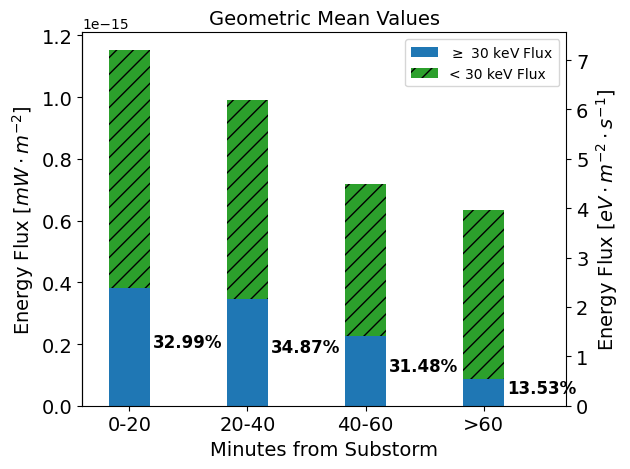

In [33]:
# Plot data as stacked bar chart

# Bar chart labels
labels = ['0-20', '20-40', '40-60', '>60']

# High and low energy values and errors
high_values = [substorm_plotting_data[names[i]]['high'] 
               for i in [0, 1, 2, 3]]
high_values_std = [substorm_plotting_data[names[i]]['high-std'] 
                   for i in [0, 1, 2, 3]]
low_values = [substorm_plotting_data[names[i]]['low'] 
              for i in [0, 1, 2, 3]]
low_values_std = [substorm_plotting_data[names[i]]['low-std'] 
                   for i in [0, 1, 2, 3]]

# Normalize values
norm_high_values = [high_values[i]/(high_values[i] + low_values[i])
                    for i in [0, 1, 2, 3]]
norm_low_values = [low_values[i]/(high_values[i] + low_values[i])
                    for i in [0, 1, 2, 3]]

fig, ax = plt.subplots()

ax.bar(labels, high_values, width=0.35, #yerr=high_values_std,
       capsize=5, color='C0', label=r'$\geq$ 30 keV Flux')
ax.bar(labels, low_values, width=0.35, #yerr=low_values_std,
       bottom=high_values, hatch='//', 
       capsize=5, color='C2', label='< 30 keV Flux')

# Edit titles and labels
ax.set_title('Geometric Mean Values', fontsize=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.tick_params(axis='y', which='major', labelsize=14)
ax.set_xlabel('Minutes from Substorm',
              fontsize = 14)
ax.set_ylabel(r'Energy Flux ${\left[eV \cdot m^{-2}\cdot s^{-1}'
              r'\right]}$', fontsize = 14)

ax.set_xlim(-0.4, 3.7)

#ax.set_yscale('log')
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

# Add secondary y axis
def eV2mJ(x):
    return x * 1.6e-16
def mJ2eV(x):
    return x / 1.6e-16
secax = ax.secondary_yaxis('left', functions=(eV2mJ, mJ2eV))
secax.set_ylabel(r'Energy Flux ${\left[mW \cdot m^{-2}'
                 r'\right]}$', fontsize = 14)
secax.tick_params(axis='y', which='major', labelsize=14)

# Add text for percentages
def plot_perc(n):
    high = round(norm_high_values[n]*100, 2)#int(round(norm_high_values[n]*100, 0))
    low = 100 - high
    ax.text(n + 0.2, high_values[n] - high_values[n]*(0.5),
            str(high) + '%', fontsize = 12, fontweight = 'bold')
#     ax.text(n + 0.2, high_values[n] + high_values[n]*(0.3 + n/10),
#             str(low) + '%', fontsize = 12, fontweight = 'bold')
    
for n in [0, 1, 2, 3]:
    plot_perc(n)
    
ax.legend(loc='upper right')

plt.tight_layout()

### Plot some statistics regarding the data in a specified bin

>60


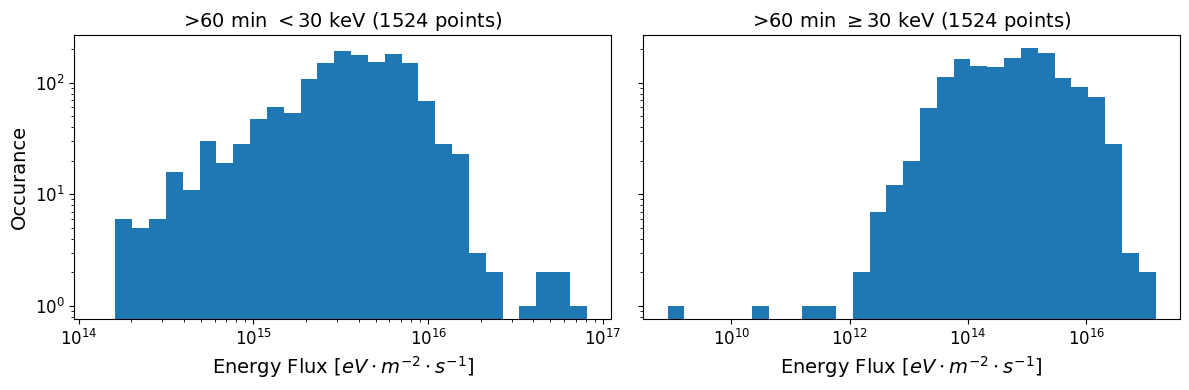

In [34]:
key = list(binary_energy_data.keys())[3]
print(key)
# High energies
high_energies = list(binary_energy_data[key]['high_'+energy_threshold]
                     .values())
high_energies = np.absolute(np.array(high_energies))
high_energy_avg = stats.mstats.gmean(high_energies)
high_energy_std = np.nanstd(high_energies)

# Low energies
low_energies = list(binary_energy_data[key]['low_'+energy_threshold]
                     .values())
low_energies = np.array(low_energies)
y1 = low_energies
y2 = high_energies

bins1 = np.logspace(np.log10(np.nanmin(y1)), np.log10(np.nanmax(y1)), 30)
bins2 = np.logspace(np.log10(np.nanmin(y2)), np.log10(np.nanmax(y2)), 30)

# Create the figure
fig, axs = plt.subplots(1, 2, figsize=(12,4), sharey=True)

# plot low energies
axs[0].set_title(r'{} min $<30$ keV ({} points)'.format(key, len(y1)), fontsize=14)
axs[0].set_xlabel(r'Energy Flux ${\left[eV \cdot m^{-2}\cdot s^{-1}'
                 r'\right]}$', fontsize=14)
axs[0].set_ylabel('Occurance', fontsize=14)
axs[0].tick_params(axis='both', labelsize=12)
axs[0].set_xscale('log')
axs[0].set_yscale('log')

axs[0].hist(y1, bins=bins1)

# plot high energies
axs[1].set_title(r'{} min $\geq30$ keV ({} points)'.format(key, len(y2)), fontsize=14)
axs[1].set_xlabel(r'Energy Flux ${\left[eV \cdot m^{-2}\cdot s^{-1}'
                 r'\right]}$', fontsize=14)
axs[1].tick_params(axis='both', labelsize=12)
axs[1].set_xscale('log')

axs[1].hist(y2, bins=bins2)

plt.tight_layout()